<a href="https://colab.research.google.com/github/saxonmahar/Deeplearning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/Housing.csv')

In [ ]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=0)

In [ ]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Absolute Error: ₹{mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28401234608128.0000 - mae: 4812068.5000
Test Mean Absolute Error: ₹5006757.50


In [ ]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
results = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred.flatten()})
print(results.head())

   Actual Price  Predicted Price
0       4060000       347.370911
1       6650000      1596.288696
2       3710000       358.494812
3       6440000       432.160980
4       2800000       315.665833


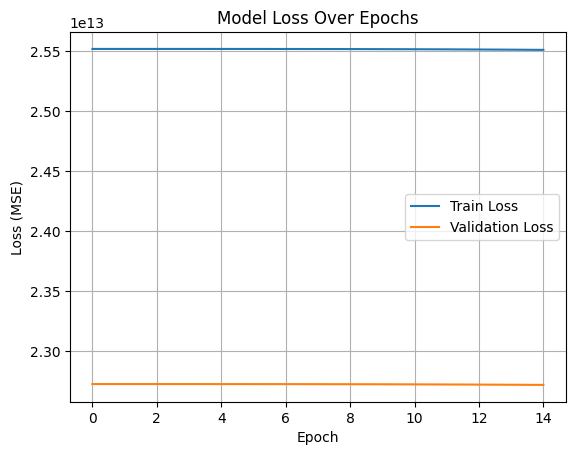

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

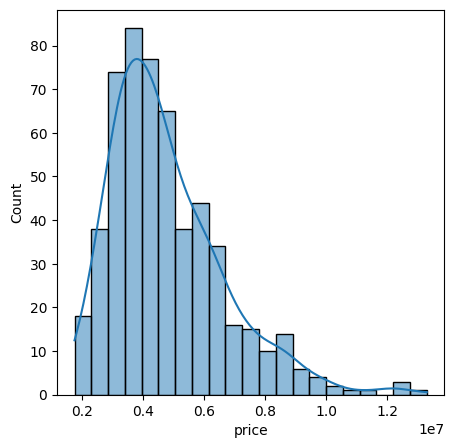

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['price'], kde=True)
plt.show()


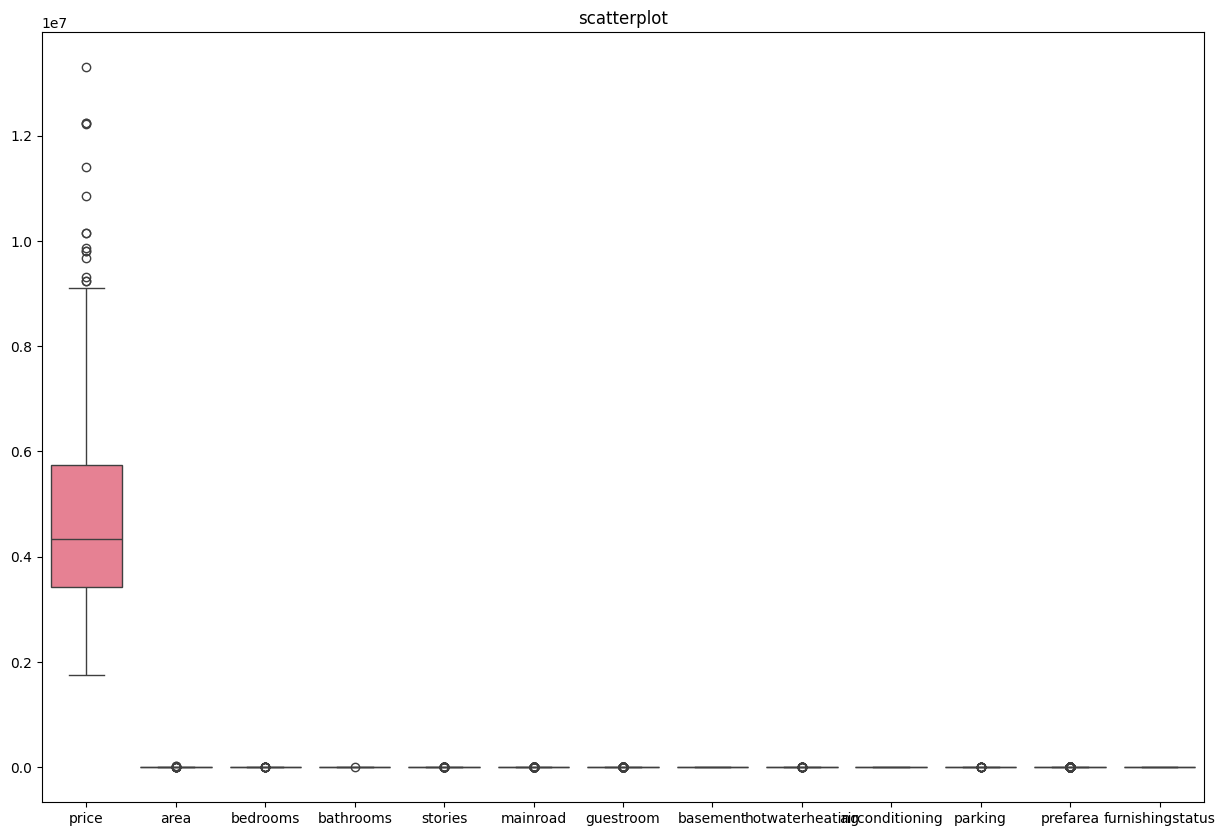

In [ ]:
plt.figure(figsize=(15,10))
plt.title('scatterplot')
sns.boxplot(df)
plt.show()


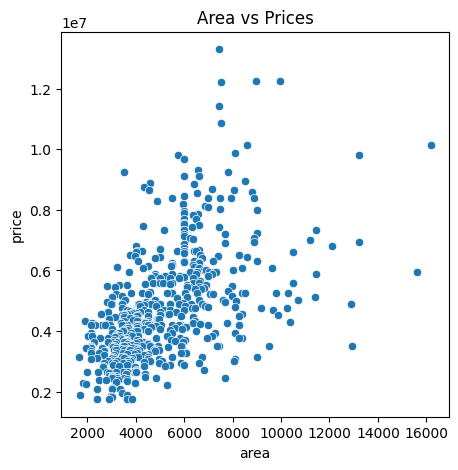

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Area vs Prices')
plt.show()